This document provides a suggested outline for the notebook used for the data challenge. Please make sure you run this notebook before you made a submission, so that you have the code and results.

## Problem definition and task allocations.

In this section, please describe briefly:
- the problems in this project.
- how do you attribute the tasks to the team members.

You can use this Table to allocate the tasks:

| Member | Task | 
| --- | --- |
| Member 1 | Task 1 |
| --- | --- |



## Reading the data

### Read the training data

In [106]:
utility_path = '../'
import sys
sys.path.insert(1, utility_path)

from util import read_all_test_data_from_path
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline

# Subfunction for data preprocessing.
def pre_processing(df: pd.DataFrame):
    ''' ### Description
    Preprocess the data:
    - remove outliers
    - add new features about the difference between the current and previous n data point.
    '''
    
    def remove_outliers(df: pd.DataFrame):
        ''' # Description
        Remove outliers from the dataframe based on defined valid ranges. 
        Define a valid range of temperature and voltage. 
        Use ffil function to replace the invalid measurement with the previous value.
        '''
        df['temperature'] = df['temperature'].where(df['temperature'] <= 100, np.nan)
        df['temperature'] = df['temperature'].where(df['temperature'] >= 0, np.nan)
        df['temperature'] = df['temperature'].ffill()        

        df['voltage'] = df['voltage'].where(df['voltage'] >= 6000, np.nan)
        df['voltage'] = df['voltage'].where(df['voltage'] <= 9000, np.nan)
        df['voltage'] = df['voltage'].ffill()        

        df['position'] = df['position'].where(df['position'] >= 0, np.nan)
        df['position'] = df['position'].where(df['position'] <= 1000, np.nan)
        df['position'] = df['position'].ffill()


    def remove_seq_variability(df: pd.DataFrame):
        ''' # Description
        Remove the sequence-to-sequence variability.
        '''
        # Tranform the features relative to the first data point.
        df['temperature'] = df['temperature'] - df['temperature'].iloc[0]
        df['voltage'] = df['voltage'] - df['voltage'].iloc[0]
        df['position'] = df['position'] - df['position'].iloc[0]
        
    # Start processing.
    remove_outliers(df)
    remove_seq_variability(df)

In [107]:
# Ignore warnings.
warnings.filterwarnings('ignore')

# Read all the dataset. Change to your dictionary if needed.
base_dictionary = 'dataset/training_data/training_data/'
df_train = read_all_test_data_from_path(base_dictionary, pre_processing, is_plot=False)

### Read the testing data.

In [108]:
# Read all the dataset. Change to your dictionary if needed.
base_dictionary = 'dataset/testing_data/'
df_test = read_all_test_data_from_path(base_dictionary, pre_processing, is_plot=False)

## Model for motor 6.

Please copy this section for the other motors as well.

### Summary of the mode 6.

In this section, please give a brief summary of the final model you used for this motor. Important details include but not limited to:
- Which model
- What are the features you used?
- Do you tune hyperparameters? If yes, how?
- Do you consider the imbalance in the data? If yes, how?

### Training

In this section, summarize how do you train your model, and put the code here.

In [109]:
from utility import extract_selected_feature, prepare_sliding_window, run_cv_one_motor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Define the motor index.
motor_idx = 6

# Specify the test conditions you would like to include in the training.
df_data_experiment = df_train[df_train['test_condition'].isin(['20240425_093699', '20240425_094425', '20240426_140055',
                                                       '20240503_164675', '20240503_165189',
                                                       '20240503_163963', '20240325_155003'])]

# Define the features.
feature_list_all = ['time', 'data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage',
                    'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage',
                    'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage',
                    'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage',
                    'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage',
                    'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']

# Define the classification model.
# Define the steps of the pipeline
steps = [
    ('standardizer', StandardScaler()),  # Step 1: StandardScaler
    ('mdl', LogisticRegression(class_weight="balanced", n_jobs=-1))    
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define hyperparameters to search
param_grid_6 = {
    'mdl__C': [0.1, 0.1, 1, 10]  # Inverse of regularization strength
}

# Initialize GridSearchCV
grid_search_6 = GridSearchCV(estimator=pipeline, param_grid=param_grid_6, scoring='f1', cv=5)

feature_list = ['data_motor_1_position', 'data_motor_1_temperature',
                    'data_motor_2_temperature', 'data_motor_2_position',
                    'data_motor_3_position', 'data_motor_3_temperature',
                    'data_motor_4_position', 'data_motor_4_voltage',
                    'data_motor_6_temperature']

# Train the model.
run_cv_one_motor(single_run_result=False, motor_idx=6, df_data=df_data_experiment, mdl=grid_search_6, feature_list=feature_list, n_fold=5, window_size=20, sample_step=5)

Model for motor 6:
   Accuracy  Precision    Recall  F1 score
0  0.156465   0.091085  0.805991  0.163673
1  0.870370   0.477551  0.609375  0.535469
2  0.578761   0.414343  0.899135  0.567273
3  0.832759   0.831889  1.000000  0.908231
4  0.672823   0.189655  0.051887  0.081481


Mean performance metric and standard error:
Accuracy: 0.6222 +- 0.2860
Precision: 0.4009 +- 0.2883
Recall: 0.6733 +- 0.3760
F1 score: 0.4512 +- 0.3350




,Accuracy,Precision,Recall,F1 score
0,0.156465,0.091085,0.805991,0.163673
1,0.870370,0.477551,0.609375,0.535469
2,0.578761,0.414343,0.899135,0.567273
3,0.832759,0.831889,1.000000,0.908231
4,0.672823,0.189655,0.051887,0.081481


### Prediction.

In this section, put the code of prediction here. In the end, please output a variable `y_pred_6`, containing the results of the prediction on motor 1.

In [110]:
df_tr_x, df_tr_y = extract_selected_feature(df_data_experiment, feature_list, motor_idx = 6, mdl_type='clf')

# Prepare for the testing dataset.

feature_list_test = ['data_motor_1_position', 'data_motor_1_temperature',
                    'data_motor_2_temperature', 'data_motor_2_position',
                    'data_motor_3_position', 'data_motor_3_temperature',
                    'data_motor_4_position', 'data_motor_4_voltage',
                    'data_motor_6_temperature', "test_condition"]

# Get the features.
df_test_x = df_test[feature_list_test]

grid_search_6.fit(df_tr_x, df_tr_y)

y_pred_6 = grid_search_6.predict(df_test_x)

Pipeline(steps=[('standardizer', StandardScaler()),
                ('mdl',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    n_jobs=-1))])

## Model for motor 5.

Please copy this section for the other motors as well.

### Summary of the mode 5.

In this section, please give a brief summary of the final model you used for this motor. Important details include but not limited to:
- Which model
- What are the features you used?
- Do you tune hyperparameters? If yes, how?
- Do you consider the imbalance in the data? If yes, how?

### Training

In this section, summarize how do you train your model, and put the code here.

Model for motor 5:

 New run:

training performance, accuracy is: 0.9987605354486861
training performance, precision is: 0.957983193277311
training performance, recall: 1.0
training performance, F1: 0.9785407725321889



 New run:

testing performance, accuracy is: 0.9897735573411249
testing performance, precision is: 0.0
testing performance, recall: 0.0
testing performance, F1: 0.0




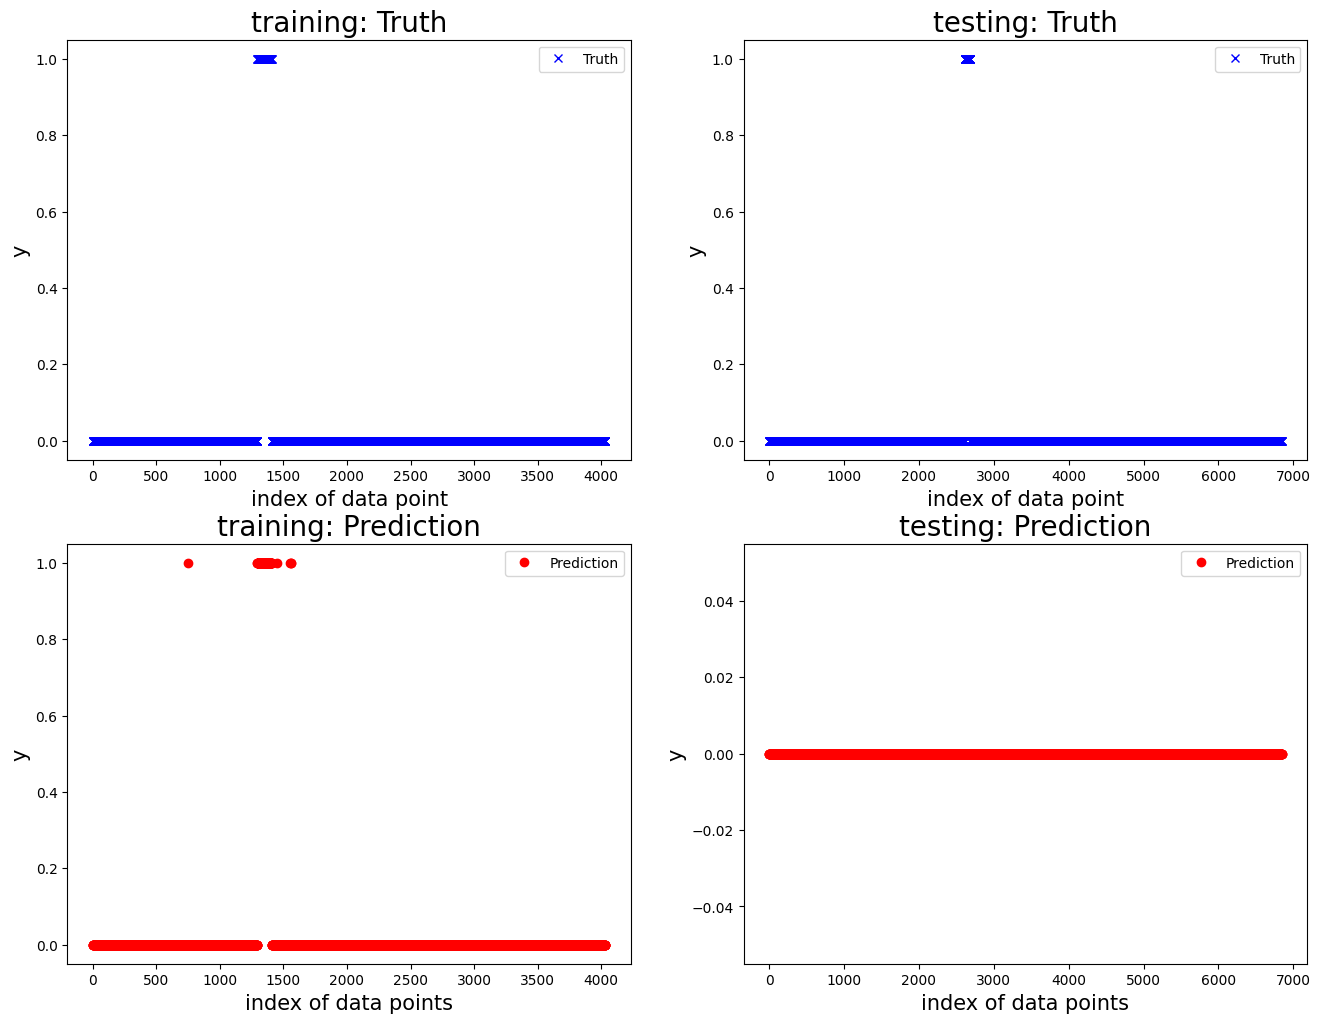


 New run:

training performance, accuracy is: 0.9872221625684527
training performance, precision is: 0.37037037037037035
training performance, recall: 1.0
training performance, F1: 0.5405405405405406



 New run:

testing performance, accuracy is: 0.9272030651340997
testing performance, precision is: 0.0
testing performance, recall: 0.0
testing performance, F1: 0.0




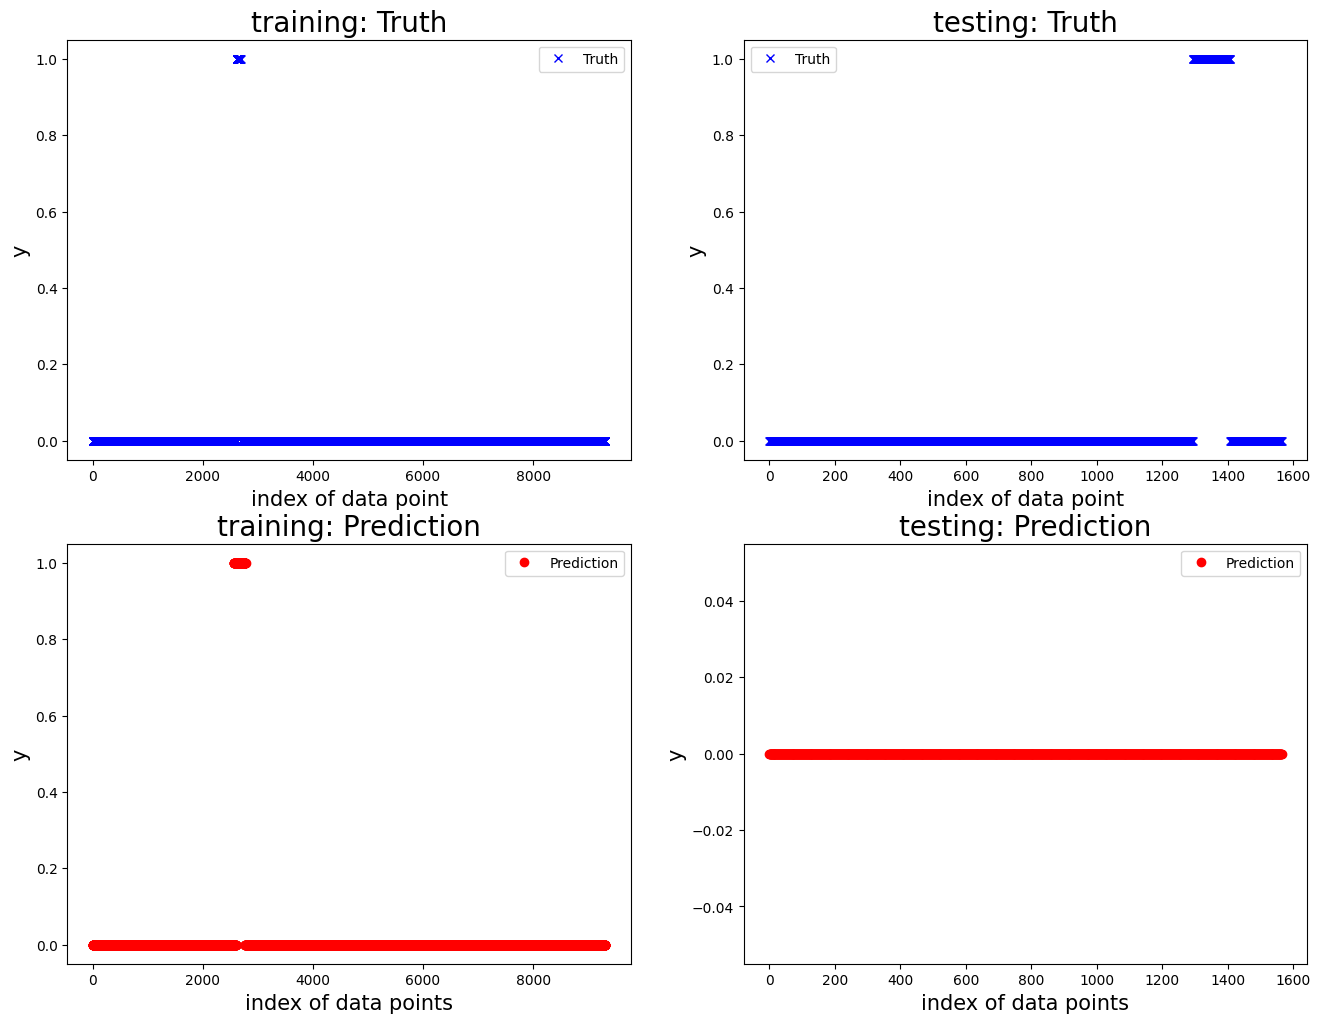


 New run:

training performance, accuracy is: 0.8952713098779362
training performance, precision is: 0.15269709543568466
training performance, recall: 1.0
training performance, F1: 0.26493880489560834



 New run:

testing performance, accuracy is: 1.0
testing performance, precision is: 1.0
testing performance, recall: 1.0
testing performance, F1: 1.0




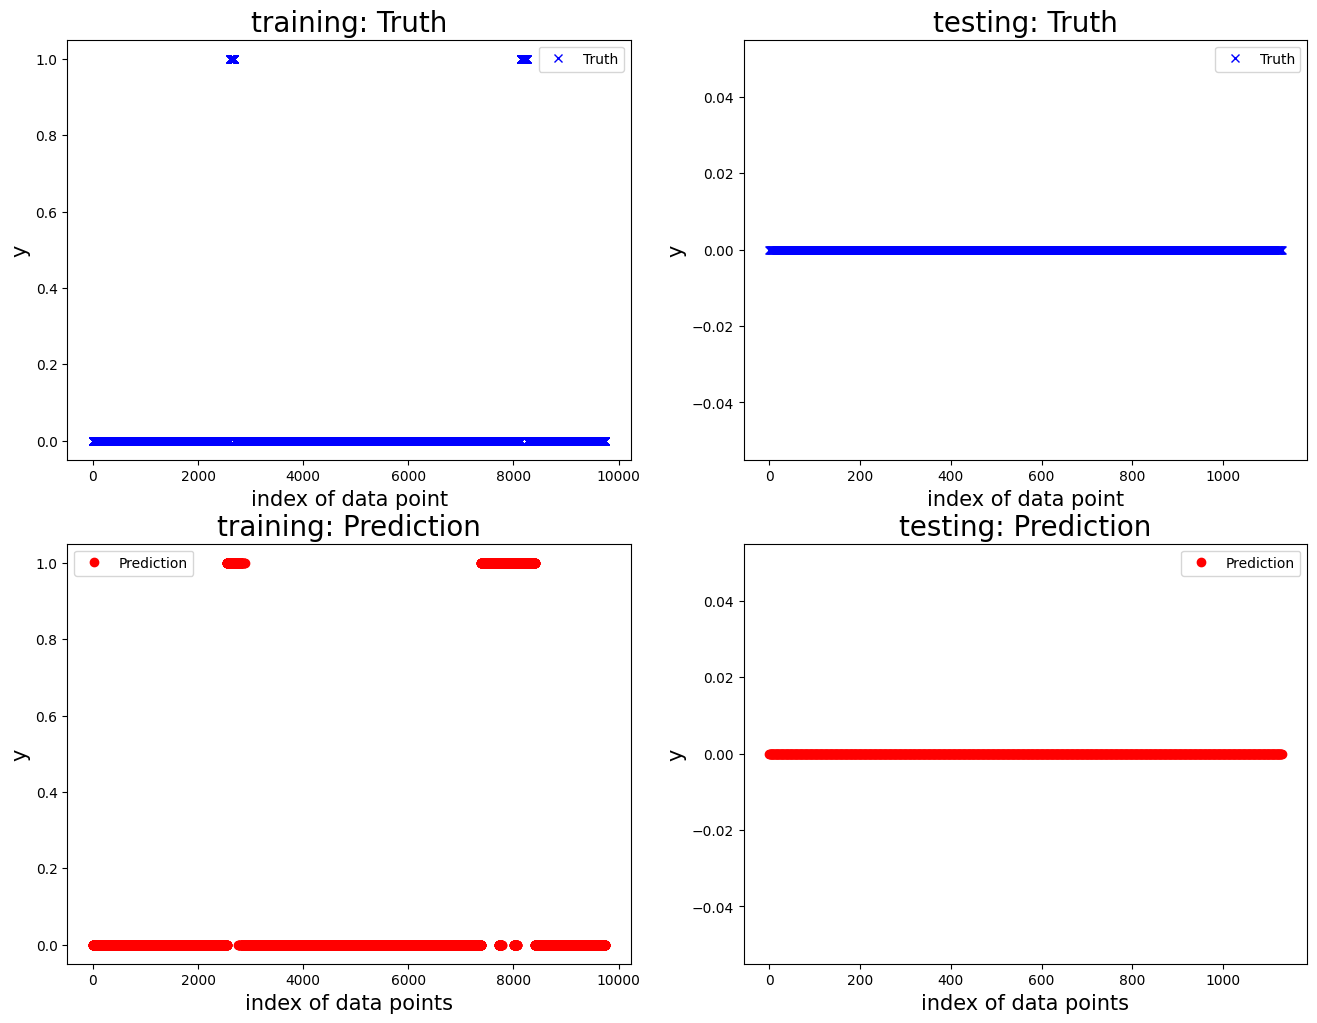


 New run:

training performance, accuracy is: 0.9273715894747063
training performance, precision is: 0.19742489270386265
training performance, recall: 1.0
training performance, F1: 0.32974910394265233



 New run:

testing performance, accuracy is: 1.0
testing performance, precision is: 1.0
testing performance, recall: 1.0
testing performance, F1: 1.0




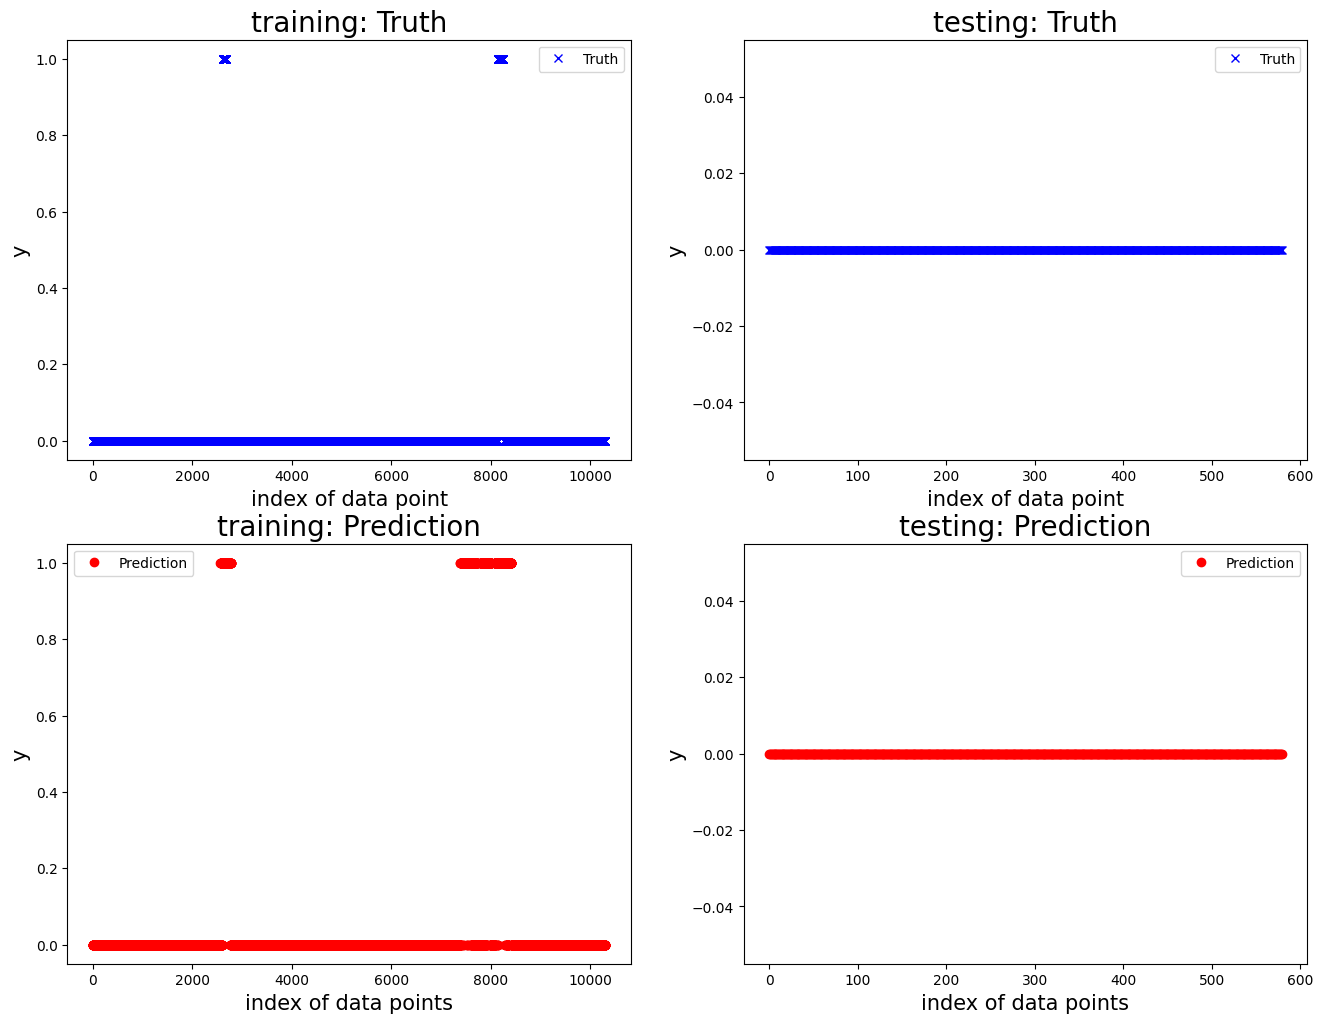


 New run:

training performance, accuracy is: 0.8978361821954353
training performance, precision is: 0.1510673234811166
training performance, recall: 1.0
training performance, F1: 0.2624821683309558



 New run:

testing performance, accuracy is: 1.0
testing performance, precision is: 1.0
testing performance, recall: 1.0
testing performance, F1: 1.0




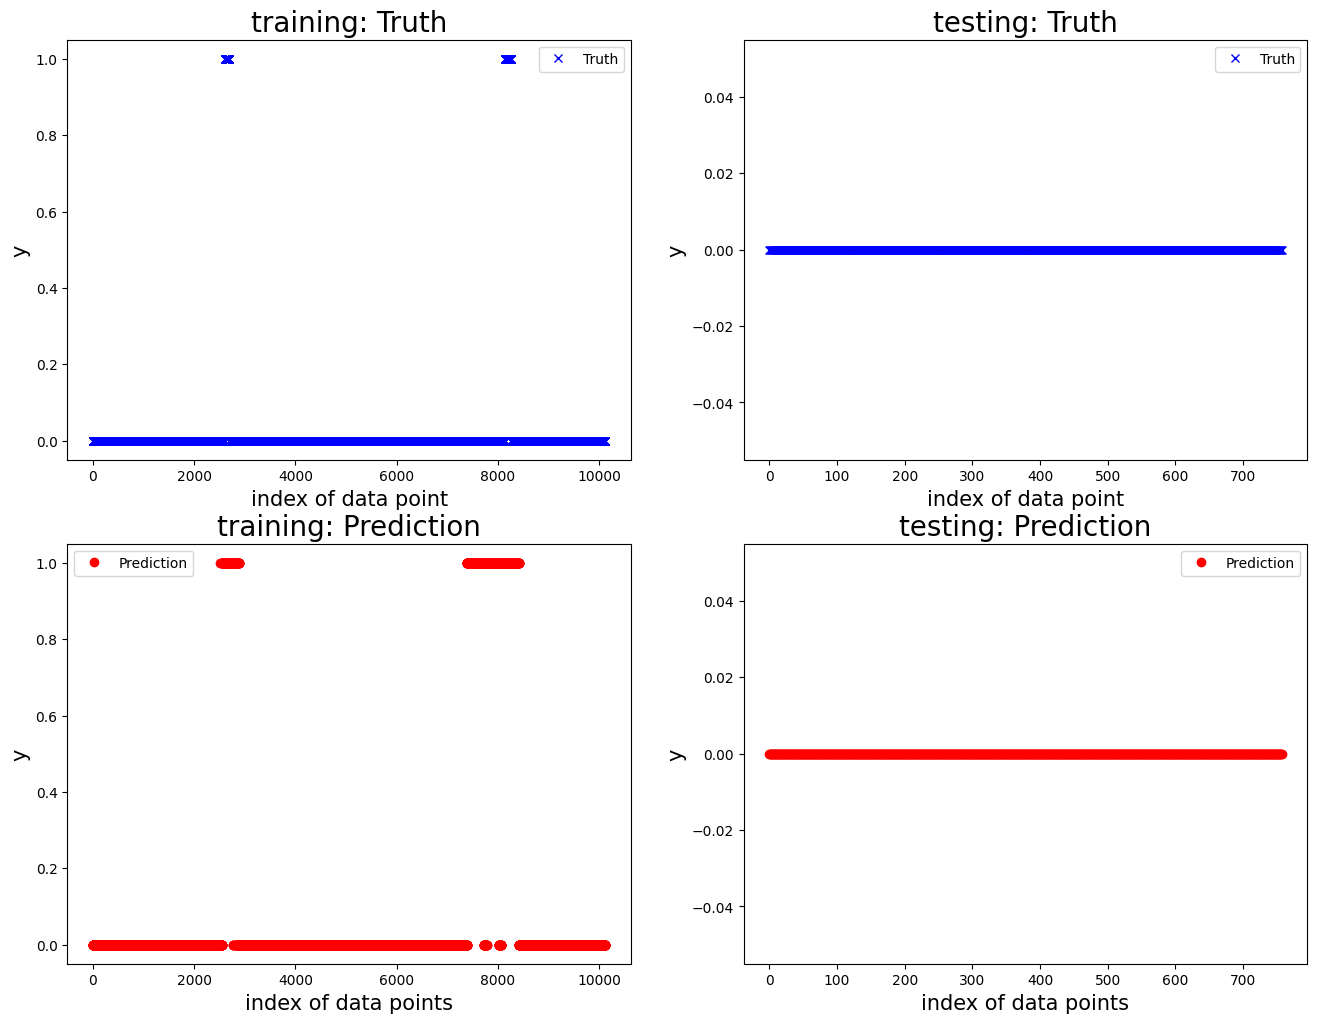

   Accuracy  Precision  Recall  F1 score
0  0.989774        0.0     0.0       0.0
1  0.927203        0.0     0.0       0.0
2  1.000000        1.0     1.0       1.0
3  1.000000        1.0     1.0       1.0
4  1.000000        1.0     1.0       1.0


Mean performance metric and standard error:
Accuracy: 0.9834 +- 0.0317
Precision: 0.6000 +- 0.5477
Recall: 0.6000 +- 0.5477
F1 score: 0.6000 +- 0.5477




,Accuracy,Precision,Recall,F1 score
0,0.989774,0.0,0.0,0.0
1,0.927203,0.0,0.0,0.0
2,1.000000,1.0,1.0,1.0
3,1.000000,1.0,1.0,1.0
4,1.000000,1.0,1.0,1.0


In [111]:
from utility import extract_selected_feature, prepare_sliding_window, run_cv_one_motor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Define the motor index.
motor_idx = 5

# Specify the test conditions you would like to include in the training.
df_data_experiment = df_train[df_train['test_condition'].isin(['20240425_093699', '20240425_094425', '20240426_140055',
                                                       '20240503_164675', '20240503_165189',
                                                       '20240503_163963', '20240325_155003'])]

# Define the features.
feature_list_all = ['time', 'data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage',
                    'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage',
                    'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage',
                    'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage',
                    'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage',
                    'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']

# Define the classification model.
# Define the steps of the pipeline
steps = [
    ('standardizer', StandardScaler()),  # Step 1: StandardScaler
    ('mdl', SVC(class_weight="balanced"))   
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define hyperparameters to search
param_grid_5 = {
    'mdl__C': [0.1, 1, 10]  # Inverse of regularization strength
}

# Initialize GridSearchCV
grid_search_5 = GridSearchCV(estimator=pipeline, param_grid=param_grid_5, scoring='f1', cv=5)

feature_list = ['data_motor_1_temperature', 'data_motor_2_voltage',
                    'data_motor_5_voltage', 'data_motor_5_temperature']

# Train the model.
run_cv_one_motor(single_run_result=True, motor_idx=5, df_data=df_data_experiment, mdl=grid_search_5, feature_list=feature_list_all, n_fold=5, window_size=20, sample_step=5)

Prediction

In [112]:
df_tr_x, df_tr_y = extract_selected_feature(df_data_experiment, feature_list, motor_idx = 5, mdl_type='clf')

# Prepare for the testing dataset.

feature_list_test = ['data_motor_1_temperature', 'data_motor_2_voltage',
                    'data_motor_5_voltage', 'data_motor_5_temperature', 'test_condition']

# Get the features.
df_test_x = df_test[feature_list_test]

grid_search_5.fit(df_tr_x, df_tr_y)

y_pred_5 = grid_search_5.predict(df_test_x)